# Table of Contents 

- **[Series](#Series)**
- **[DataFrame](#DataFrame)**
    - [Accessing a DataFrame](#Accessing-a-DataFrame)
    - [Boolean Indexing](#Boolean-Indexing)
    - [Adding columns and rows](#Adding-columns-and-rows)
    - [Deleting columns and rows](#Deleting-columns-and-rows)
    - [Reading and Writing DataFrames](#Reading-and-Writing-DataFrames)
    - [Missing Data](#Missing-data)
- **[DataFrame Operations](#DataFrame-Operations)**
    - [Matrix operations](#Matrix-operations)
    - [Column operations](#Column-operations)
    - [Data Splitting](#Data-Splitting)

**Pandas** is desgined to make **data pre-processing and data analysis fast and easy in Python**. Pandas adopts many coding idioms from NumPy, such as avoiding the `for` loops, but it is designed for working with heterogenous data represented in tabular format.

To use Pandas, you need to import the `pandas` module, using for example:

In [1]:
import pandas as pd
import numpy as np # we will also need numpy

print('numpy', np.__version__)
print('pandas', pd.__version__)

numpy 2.3.2
pandas 2.3.2


This import style is quite standard; all objects and functions the `pandas` package will now be invoked with the `pd.` prefix.


## Aside: Numpy
NumPy (**Num**erical **Py**thon) is the fundamental package for scientific computing with Python. It contains, among other things:

- a powerful N-dimensional array object
- sophisticated functions that support broadcasting (i.e., it allows to perform arithmetic operations between arrays with different shape)
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

The core object of numpy is **ndarray**: N-dimensional Array. It represents a *multidimensional*, *homogeneous* array of *fixed-size items*.

In [2]:
# example of 1-dimen sional array
np.arange(0, 1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [3]:
# example of 2-dimensional array
my_ndarray = np.zeros((3, 5))
my_ndarray

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [4]:
np.asarray([1, 2, 3])

array([1, 2, 3])

In [5]:
type(np.asarray([1, 2, 3]))

numpy.ndarray

In [6]:
print(my_ndarray)
print(my_ndarray.shape)
print(my_ndarray.ndim)
print(my_ndarray.size)
print(my_ndarray.dtype)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
(3, 5)
2
15
float64


There are several NumPy functions for [creating arrays](https://docs.scipy.org/doc/numpy/user/quickstart.html#array-creation):

| Function | Description |
| ---: | :--- |
| `np.array(a)` | Create $n$-dimensional NumPy array from sequence `a` |
| `np.linspace(a, b, N)` | Create 1D NumPy array with `N` equally spaced values from `a` to `b` (inclusively)|
| `np.arange(a, b, step)` | Create 1D NumPy array with values from `a` to `b` (exclusively) incremented by `step`|
| `np.zeros(N)` | Create 1D NumPy array of zeros of length $N$ |
| `np.zeros((n, m))` | Create 2D NumPy array of zeros with $n$ rows and $m$ columns |
| `np.ones(N)` | Create 1D NumPy array of ones of length $N$ |
| `np.ones((n, m))` | Create 2D NumPy array of ones with $n$ rows and $m$ columns |
| `np.eye(N)` | Create 2D NumPy array with $N$ rows and $N$ columns with ones on the diagonal (ie. the identity matrix of size $N$) |

### Mathematical Functions

[Mathematical functions](http://docs.scipy.org/doc/numpy/reference/routines.math.html) in NumPy are called [**universal functions**](https://docs.scipy.org/doc/numpy/user/quickstart.html#universal-functions) (ufuncs) and are *vectorized*. Vectorized functions operate *element-wise* on arrays producing arrays as output and are built to compute values across arrays *very* quickly. 

The following table contains a list of the most important **unary** ufuncs.

|Function| Description |
|:-------|:---------|
|`np.abs`|Compute the absolute value element-wise for integer, floating-point, or complex values|
|`np.sqrt`|Compute the square root of each element|
|`np.exp`|Compute the exponent $e^x$ of each element|
|`np.log`, `np.log10`, `np.log2`, `np.log1p`|Natural logarithm (base e), log base 10, log base 2, and log(1 + x), respectively|
|`np.sign`|Compute the sign of each element: 1 (positive), 0 (zero), or –1 (negative)|
|`np.ceil`|Compute the ceiling of each element|
|`np.floor`|Compute the floor of each element|
|`np.modf`|Return fractional and integral parts of array as a separate array|
|`np.isnan`|Return boolean array indicating whether each value is `NaN` (Not a Number)|
|`np.cos`, `np.cosh`, `np.sin`, `np.sinh`, `np.tan`, `np.tanh`|Regular and hyperbolic trigonometric functions|
|`np.arccos`, `np.arccosh`, `np.arcsin`, `np.arcsinh`, `np.arctan`, `np.arctanh`|Inverse trigonometric functions|

The following table contains a list of the most important **binary** ufuncs.

|Function| Description |
|:-------|:---------|
|`np.add`|Element-wise addition|
|`np.subtract`|Element-wise subtraction|
|`np.multiply`|Element-wise multiplication|
|`np.divide`|Element-wise division|
|`np.mod`|Element-wise modulus|
|`np.power`|Raise elements in first array to powers indicated in second array |
|`np.maximum`, `np.fmax`|Element-wise maximum; `np.fmax` ignores `NaN`|
|`np.minimum`, `np.fmin`|Element-wise minimum; `np.fmin` ignores `NaN`|


Pandas has two main data structures, **Series** and **DataFrame**.


# Series

Series are the Pandas version of 1-D Numpy arrays. 

An instance of Series is a single dimension array-like object containing:
- a *sequence of values*,
- an array of *data labels*, namely its **index**.

A Series can be created easily from a Python list:

In [7]:
ts = pd.Series([4, 8, 1, 3])
print(ts)

0    4
1    8
2    1
3    3
dtype: int64


The string representation of a Series display two columns: the first column represents the index array, the second column represents the values array. Since no index was specified, the default indexing consists of increasing integers starting from 0. 

The underlying structure can be recovered with the `values` attribute:

In [8]:
print(ts.values)
print(type(ts.values))

[4 8 1 3]
<class 'numpy.ndarray'>


To create a Series with its own index, you can write:

In [9]:
ts = pd.Series([4, 8, 1, 3], index = ['first', 'second', 'third', 'fourth'])
print(ts)

first     4
second    8
third     1
fourth    3
dtype: int64


The labels in the index can be used to select values in the Series:

In [10]:
print(ts['first'])

4


In [11]:
print(ts[['second', 'fourth']])

second    8
fourth    3
dtype: int64


You can think about a Series as a kind of fixed-length, ordered Python's `dict`, mapping index values to data values. In fact, it is possible to create a Series directlty from a Python's `dict`:

In [12]:
my_dict = {'Pisa': 80, 'London': 300, 'Paris': 1}
ts = pd.Series(my_dict)
print(ts)

Pisa       80
London    300
Paris       1
dtype: int64


Sorting a series:

- sort by values

In [13]:
ts.sort_values()

Paris       1
Pisa       80
London    300
dtype: int64

- sort by index

In [14]:
ts.sort_index()

London    300
Paris       1
Pisa       80
dtype: int64

In [15]:
ts

Pisa       80
London    300
Paris       1
dtype: int64

In [16]:
ts.sort_values?

Signature:
ts.sort_values(
    *,
    axis: 'Axis' = 0,
    ascending: 'bool | Sequence[bool]' = True,
    inplace: 'bool' = False,
    kind: 'SortKind' = 'quicksort',
    na_position: 'NaPosition' = 'last',
    ignore_index: 'bool' = False,
    key: 'ValueKeyFunc | None' = None,
) -> 'Series | None'
Docstring:
Sort by the values.

Sort a Series in ascending or descending order by some
criterion.

Parameters
----------
axis : {0 or 'index'}
    Unused. Parameter needed for compatibility with DataFrame.
ascending : bool or list of bools, default True
    If True, sort values in ascending order, otherwise descending.
inplace : bool, default False
    If True, perform operation in-place.
kind : {'quicksort', 'mergesort', 'heapsort', 'stable'}, default 'quicksort'
    Choice of sorting algorithm. See also :func:`numpy.sort` for more
    information. 'mergesort' and 'stable' are the only stable  algorithms.
na_position : {'first' or 'last'}, default 'last'
    Argument 'first' puts NaNs at 

Note: **no pandas method has the side effect of modifying your data; almost every method returns a new object, leaving the original object untouched. If the data is modified, it is because you did so explicitly.**

# DataFrame

A DataFrame is a **rectangular table of data**. It contains an ordered list of columns. Every column can be of a different type. 

A DataFrame has both a *row index* and a *column index*. It can be thought as a *dictionary of Series* (one per column) all sharing the same index labels.

There are many ways to construct a DataFrame: most common ways are using a dictionary of Python's lists, dictionary of NumPy's arrays, dictionary of dictionaries.

In [17]:
cars = {'Brand': ['Honda Civic', 'Toyota Corolla', 'Ford Focus', 'Audi A4'],
        'Price': [22000, 25000, 27000, 35000],
        'Wheels': 4} # broadcast if possible

df = pd.DataFrame(cars)
print(df)

            Brand  Price  Wheels
0     Honda Civic  22000       4
1  Toyota Corolla  25000       4
2      Ford Focus  27000       4
3         Audi A4  35000       4


The resulting DataFrame will receive its index automatically as with Series.

To pretty-print a DataFrame in a Jupyter notebooks, it is enough to write its name (or using the `head()` instance method for very long DataFrames):

In [18]:
display(df)

,Brand,Price,Wheels
0,Honda Civic,22000,4
1,Toyota Corolla,25000,4
2,Ford Focus,27000,4
3,Audi A4,35000,4


In [19]:
df

,Brand,Price,Wheels
0,Honda Civic,22000,4
1,Toyota Corolla,25000,4
2,Ford Focus,27000,4
3,Audi A4,35000,4


Access the T attribute, to transpose a dataframe

In [20]:
df.T 

,0,1,2,3
Brand,Honda Civic,Toyota Corolla,Ford Focus,Audi A4
Price,22000,25000,27000,35000
Wheels,4,4,4,4


In [21]:
df.head(2)

,Brand,Price,Wheels
0,Honda Civic,22000,4
1,Toyota Corolla,25000,4


In [22]:
df.tail(2)

,Brand,Price,Wheels
2,Ford Focus,27000,4
3,Audi A4,35000,4


A summary of the *numerical* data is provided by `describe`:

In [23]:
df.describe() # by default it includes only "numbers"

,Price,Wheels
count,4.000000,4.0
mean,27250.000000,4.0
std,5560.275773,0.0
min,22000.000000,4.0
25%,24250.000000,4.0
50%,26000.000000,4.0
75%,29000.000000,4.0
max,35000.000000,4.0


In [24]:
df.describe(include = 'object')

,Brand
count,4
unique,4
top,Honda Civic
freq,1


In [25]:
df.describe(include = 'all')

,Brand,Price,Wheels
count,4,4.000000,4.0
unique,4,NaN,NaN
top,Honda Civic,NaN,NaN
freq,1,NaN,NaN
mean,NaN,27250.000000,4.0
std,NaN,5560.275773,0.0
min,NaN,22000.000000,4.0
25%,NaN,24250.000000,4.0
50%,NaN,26000.000000,4.0
75%,NaN,29000.000000,4.0


Obtain generic information about the dataset, including columns name and non null count with 
`info`.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Brand   4 non-null      object
 1   Price   4 non-null      int64 
 2   Wheels  4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 228.0+ bytes


Retrieve the column names with `keys()` method or `column` attribute:

In [27]:
print(df.keys())

Index(['Brand', 'Price', 'Wheels'], dtype='object')


In [28]:
print(df.columns)

Index(['Brand', 'Price', 'Wheels'], dtype='object')


Many feature from the NumPy package can be directly used with Pandas DataFrames

In [29]:
df.values

array([['Honda Civic', 22000, 4],
       ['Toyota Corolla', 25000, 4],
       ['Ford Focus', 27000, 4],
       ['Audi A4', 35000, 4]], dtype=object)

In [30]:
print(df.shape)

(4, 3)


## Accessing a DataFrame

Let's create a brand new DataFrame:

In [31]:
dict_of_list = {'birth': [1860, 1770, 1858, 1906], 
                'death': [1911, 1827, 1924, 1975], 
                'city': ['Kaliste', 'Bonn', 'Lucques', 'Saint-Petersburg']}
composers_df = pd.DataFrame(dict_of_list, index = ['Mahler', 'Beethoven', 'Puccini', 'Shostakovich'])
composers_df

,birth,death,city
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg


There are multiple ways of accessing values or series of values in a Dataframe. Unlike in Series, a simple bracket gives access to a column and not an index, for example:

In [32]:
composers_df['city']

Mahler                   Kaliste
Beethoven                   Bonn
Puccini                  Lucques
Shostakovich    Saint-Petersburg
Name: city, dtype: object

returns a Series. Alternatively one can also use the attributes syntax and access columns by using:

In [33]:
composers_df.city

Mahler                   Kaliste
Beethoven                   Bonn
Puccini                  Lucques
Shostakovich    Saint-Petersburg
Name: city, dtype: object

The attributes syntax has some limitations, so in case something does not work as expected, revert to the brackets notation.

When specifiying multiple columns, a DataFrame is returned:

In [34]:
composers_df[['city', 'birth']]

,city,birth
Mahler,Kaliste,1860
Beethoven,Bonn,1770
Puccini,Lucques,1858
Shostakovich,Saint-Petersburg,1906


Standard indexing operators (just slices the rows)

In [35]:
composers_df[0:2]

,birth,death,city
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn


from the [docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html):
>The Python and NumPy indexing operators [$\cdot$] and attribute operator  `.` provide quick and easy access to pandas data structures across a wide range of use cases. This makes interactive work intuitive, as there’s little new to learn if you already know how to deal with Python dictionaries and NumPy arrays. However, since the type of the data to be accessed isn’t known in advance, directly using standard operators has some optimization limits. For production code, we recommended that you take advantage of the **optimized pandas data access methods**.



Pandas optimized data access methods:  `iloc` and `loc`.

**Remember that `loc` and `iloc` are attributes, not methods, hence they use brackets `[]` and not parenthesis `()`.**

The `loc` attribute allows to recover elements by using the index labels, while the `iloc` attribute can be used to recover the regular indexing:

In [36]:
composers_df.iloc[0:2, :]

,birth,death,city
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn


In [37]:
composers_df.loc[['Mahler', 'Beethoven'], 'death']


Mahler       1911
Beethoven    1827
Name: death, dtype: int64

In [38]:
composers_df.loc['Beethoven', 'death']

np.int64(1827)

## Boolean Indexing

Just like with Numpy, it is possible to subselect parts of a Dataframe using boolean indexing.
A logical Series can be used as an index to select elements in the Dataframe.

In [39]:
composers_df

,birth,death,city
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg


In [40]:
mask = composers_df['death'] > 1859
print(mask)
composers_df[mask]

Mahler           True
Beethoven       False
Puccini          True
Shostakovich     True
Name: death, dtype: bool


,birth,death,city
Mahler,1860,1911,Kaliste
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg


More compact:

In [41]:
composers_df[composers_df['birth'] > 1900]

,birth,death,city
Shostakovich,1906,1975,Saint-Petersburg


To sum up: basics of indexing
| Operation | Syntax | Result |
| :---: | :---: | :---: |
| Select column | `df[col]` (or `df.col`, where possible) | Series |
| Select row by label | `df.loc[label]` | Series |
| Select row by integer location | `df.iloc[loc]` | Series |
| Slice rows | `df[5:10]` | DataFrame |
| Select rows by boolean vector | `df[bool_vect]` | DataFrame |


## Adding columns and rows

It is very simple to add a column to a Dataframe:

In [42]:
composers_df['country'] = '???' # broadcast if possible
composers_df

,birth,death,city,country
Mahler,1860,1911,Kaliste,???
Beethoven,1770,1827,Bonn,???
Puccini,1858,1924,Lucques,???
Shostakovich,1906,1975,Saint-Petersburg,???


Alternatively, an existing list can be used:

In [43]:
composers_df['country2'] = ['Austria', 'Germany', 'Italy', 'Russia']
composers_df

,birth,death,city,country,country2
Mahler,1860,1911,Kaliste,???,Austria
Beethoven,1770,1827,Bonn,???,Germany
Puccini,1858,1924,Lucques,???,Italy
Shostakovich,1906,1975,Saint-Petersburg,???,Russia


A DataFrame or a Series can be "appended" to another DataFrame through `pd.concat`

In [44]:
new_row = pd.DataFrame({'Sibelius': {'birth': None, 'death': 1900, 'city': None, 'country': None}}).T
new_row

,birth,death,city,country
Sibelius,NaN,1900.0,NaN,NaN


In [45]:
pd.concat((composers_df, new_row))

,birth,death,city,country,country2
Mahler,1860.0,1911.0,Kaliste,???,Austria
Beethoven,1770.0,1827.0,Bonn,???,Germany
Puccini,1858.0,1924.0,Lucques,???,Italy
Shostakovich,1906.0,1975.0,Saint-Petersburg,???,Russia
Sibelius,NaN,1900.0,NaN,NaN,NaN


More on [Database-style DataFrame or named Series joining/merging](https://pandas.pydata.org/docs/user_guide/merging.html#database-style-dataframe-or-named-series-joining-merging)

## Deleting columns and rows

In [46]:
composers_df

,birth,death,city,country,country2
Mahler,1860,1911,Kaliste,???,Austria
Beethoven,1770,1827,Bonn,???,Germany
Puccini,1858,1924,Lucques,???,Italy
Shostakovich,1906,1975,Saint-Petersburg,???,Russia


In [47]:
composers_df.drop(columns = ['country2'])

,birth,death,city,country
Mahler,1860,1911,Kaliste,???
Beethoven,1770,1827,Bonn,???
Puccini,1858,1924,Lucques,???
Shostakovich,1906,1975,Saint-Petersburg,???


In [48]:
tmp_df = composers_df.drop('Puccini')
tmp_df

,birth,death,city,country,country2
Mahler,1860,1911,Kaliste,???,Austria
Beethoven,1770,1827,Bonn,???,Germany
Shostakovich,1906,1975,Saint-Petersburg,???,Russia


In [49]:
composers_df #note that, by default, drop does not operate in-place

,birth,death,city,country,country2
Mahler,1860,1911,Kaliste,???,Austria
Beethoven,1770,1827,Bonn,???,Germany
Puccini,1858,1924,Lucques,???,Italy
Shostakovich,1906,1975,Saint-Petersburg,???,Russia


In [50]:
#composers_df.drop?

## Reading and Writing DataFrames

A common way of "creating" a Pandas Dataframe is by importing a table from another format like CSV (comma separated values) or Excel. 

### CSV format

In [51]:
df

,Brand,Price,Wheels
0,Honda Civic,22000,4
1,Toyota Corolla,25000,4
2,Ford Focus,27000,4
3,Audi A4,35000,4


In [52]:
df.to_csv('out/foo.csv')

In [53]:
df_read = pd.read_csv('out/foo.csv')
df_read

,Unnamed: 0,Brand,Price,Wheels
0,0,Honda Civic,22000,4
1,1,Toyota Corolla,25000,4
2,2,Ford Focus,27000,4
3,3,Audi A4,35000,4


In [54]:
df_read = pd.read_csv('out/foo.csv', index_col = 0)
df_read

,Brand,Price,Wheels
0,Honda Civic,22000,4
1,Toyota Corolla,25000,4
2,Ford Focus,27000,4
3,Audi A4,35000,4


### Importing Excel files

An Excel table is provided in the [composers.xlsx](data/composers.xlsx) file and can be read with the `pd.read_excel` function.

You may need to install `openpyxl` package through `pip install openpyxl`

In [55]:
#!pip install openpyxl

In [56]:
composers_df = pd.read_excel('dataset/composers.xlsx')
composers_df

,composer,birth,death,city
0,Mahler,1860,1911,Kaliste
1,Beethoven,1770,1827,Bonn
2,Puccini,1858,1924,Lucques
3,Shostakovich,1906,1975,Saint-Petersburg


The reader automatically recognized the heaers of the file. However it created a new index. If needed we can specify which column to use as header:

In [57]:
#pd.read_excel?

In [58]:
composers_df = pd.read_excel('dataset/composers.xlsx', index_col = 'composer')
composers_df

,birth,death,city
composer,,,
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg


If we open the file in Excel, we see that it is composed of more than one sheet. Clearly, when not specifying anything, the reader only reads the first sheet. However we can specify a sheet:

In [59]:
composers_df = pd.read_excel('dataset/composers.xlsx', index_col = 'composer', sheet_name = 'Sheet2')
composers_df

,birth,death,city
composer,,,
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg
Sibelius,unknown,unknown,unknown
Haydn,NaN,NaN,Rohrau


In [60]:
composers_df.describe()

,birth,death,city
count,5,5,6
unique,5,5,6
top,1860,1911,Kaliste
freq,1,1,1


As you can see above, some information is missing. Some missing values are marked as "`unknown`" while other are `NaN`. `NaN` is the standard symbol for unknown/missing values and is understood by Pandas while "`unknown`" is just seen as text. 
This is impractical as now we have columns with a mix of numbers and text which will make later computations difficult. What we would like to do is to replace all "irrelevant" values with the standard `NaN` symbol that says "*no information*".
For this we can use the `na_values` argument to specify what should be a `NaN`:

In [61]:
composers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Mahler to Haydn
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   birth   5 non-null      object
 1   death   5 non-null      object
 2   city    6 non-null      object
dtypes: object(3)
memory usage: 192.0+ bytes


In [62]:
composers_df = pd.read_excel('dataset/composers.xlsx', 
                             index_col = 'composer', 
                             sheet_name = 'Sheet2', 
                             na_values = ['unknown'])
composers_df

,birth,death,city
composer,,,
Mahler,1860.0,1911.0,Kaliste
Beethoven,1770.0,1827.0,Bonn
Puccini,1858.0,1924.0,Lucques
Shostakovich,1906.0,1975.0,Saint-Petersburg
Sibelius,NaN,NaN,NaN
Haydn,NaN,NaN,Rohrau


In [63]:
composers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Mahler to Haydn
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   birth   4 non-null      float64
 1   death   4 non-null      float64
 2   city    5 non-null      object 
dtypes: float64(2), object(1)
memory usage: 192.0+ bytes


### Read / Write SQL database

from the [docs](https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html)

Read data from SQL via either a SQL query or a SQL tablename. 
Note that when using a SQLite database only SQL queries are accepted, providing only the SQL tablename will result in an error.

In [64]:
from sqlite3 import connect
# most common way to force an SQLite database to exist purely in memory 
conn = connect(':memory:') 
df = pd.DataFrame(data=[[0, '10/11/12'], 
                        [1, '12/11/10']], 
                  columns = ['int_column', 'date_column'])
df.to_sql('test_data', conn) 
# Returns number of rows affected by to_sql, or None if the callable passed into method does not return an integer number of rows.

2

In [65]:
df

,int_column,date_column
0,0,10/11/12
1,1,12/11/10


In [66]:
pd.read_sql('SELECT int_column, date_column FROM test_data', conn)

,int_column,date_column
0,0,10/11/12
1,1,12/11/10


## Missing data
pandas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations.

In [67]:
df_new = composers_df.copy()

In [68]:
df_new

,birth,death,city
composer,,,
Mahler,1860.0,1911.0,Kaliste
Beethoven,1770.0,1827.0,Bonn
Puccini,1858.0,1924.0,Lucques
Shostakovich,1906.0,1975.0,Saint-Petersburg
Sibelius,NaN,NaN,NaN
Haydn,NaN,NaN,Rohrau


The `pd.isnull` (or `pd.isna`) and `pd.notnull` (or `pd.notna`) functions detects missing data. There are also corresponding **instance methods**. Get a boolean mask where values are `np.nan` (same for Series).

In [69]:
pd.isna(df_new)

,birth,death,city
composer,,,
Mahler,False,False,False
Beethoven,False,False,False
Puccini,False,False,False
Shostakovich,False,False,False
Sibelius,True,True,True
Haydn,True,True,False


In [70]:
df_new.isna().values.any()

np.True_

In [71]:
df_new.isna().sum()

birth    2
death    2
city     1
dtype: int64

# DataFrame Operations

One of the great advantages of using Pandas to handle tabular data is how simple it is to extract valuable information from them. Here we are going to see various types of operations that are available for this.


## Matrix operations

The strength of Numpy is its natural way of handling matrix operations, and Pandas reuses a lot of these features. For example one can use simple mathematical operations to opereate at the cell level:

In [72]:
df = pd.read_excel('dataset/composers.xlsx')
df

,composer,birth,death,city
0,Mahler,1860,1911,Kaliste
1,Beethoven,1770,1827,Bonn
2,Puccini,1858,1924,Lucques
3,Shostakovich,1906,1975,Saint-Petersburg


In [73]:
2024-df['birth'] 

0    164
1    254
2    166
3    118
Name: birth, dtype: int64

In [74]:
np.log(df['birth'])

0    7.528332
1    7.478735
2    7.527256
3    7.552762
Name: birth, dtype: float64

We can directly use an operation's output to create a new column:

In [75]:
df['age'] = df['death'] - df['birth']
df

,composer,birth,death,city,age
0,Mahler,1860,1911,Kaliste,51
1,Beethoven,1770,1827,Bonn,57
2,Puccini,1858,1924,Lucques,66
3,Shostakovich,1906,1975,Saint-Petersburg,69


## Column operations

There are other types of functions whose purpose is to summarize the data, e.g., by computing the mean or standard deviation. Pandas by default applies such functions column-wise and return a Series.

In [76]:
df[['birth', 'death', 'age']].mean()

birth    1848.50
death    1909.25
age        60.75
dtype: float64

Sometimes one needs to apply to a column a very specific function that is not provided by default. In that case we can use one of the different `apply` methods of Pandas.

The simplest case is to apply a function to a column, or Series of a DataFrame. Let's say for example that we want to define the age >60 as 'old' and <60 as 'young'. We can define the following general function:

In [77]:
def define_age(x):
    if x>60:
        return 'old'
    else:
        return 'young'

We can now apply this function on an entire Series:

In [78]:
df['categorical age'] = df.age.apply(define_age)

In [79]:
df

,composer,birth,death,city,age,categorical age
0,Mahler,1860,1911,Kaliste,51,young
1,Beethoven,1770,1827,Bonn,57,young
2,Puccini,1858,1924,Lucques,66,old
3,Shostakovich,1906,1975,Saint-Petersburg,69,old


In [80]:
df['compact categorical age'] = df.age.apply(lambda x: 'old' if x > 60 else 'young') 
# as before, but more compact

df

,composer,birth,death,city,age,categorical age,compact categorical age
0,Mahler,1860,1911,Kaliste,51,young,young
1,Beethoven,1770,1827,Bonn,57,young,young
2,Puccini,1858,1924,Lucques,66,old,old
3,Shostakovich,1906,1975,Saint-Petersburg,69,old,old


### Value Counting

In [81]:
df['categorical age'].value_counts()

categorical age
young    2
old      2
Name: count, dtype: int64

In [82]:
df['categorical age'].unique()

array(['young', 'old'], dtype=object)

## Data Splitting

Often Pandas tables mix regular variables (e.g. the size of cells in microscopy images) with categorical variables (e.g. the type of cell to which they belong). In that case, it is quite usual to split the data using the category to do computations. Pandas allows to do this very easily.

### Grouping

In [83]:
composers_df = pd.read_excel('dataset/composers.xlsx', index_col = 'composer', sheet_name = 'Sheet5')

In [84]:
composers_df

,birth,death,period,country
composer,,,,
Mahler,1860,1911.0,post-romantic,Austria
Beethoven,1770,1827.0,romantic,Germany
Puccini,1858,1924.0,post-romantic,Italy
Shostakovich,1906,1975.0,modern,Russia
Verdi,1813,1901.0,romantic,Italy
Dvorak,1841,1904.0,romantic,Czechia
Schumann,1810,1856.0,romantic,Germany
Stravinsky,1882,1971.0,modern,Russia
Sibelius,1865,1957.0,post-romantic,Finland


In [85]:
composers_df.head()

,birth,death,period,country
composer,,,,
Mahler,1860,1911.0,post-romantic,Austria
Beethoven,1770,1827.0,romantic,Germany
Puccini,1858,1924.0,post-romantic,Italy
Shostakovich,1906,1975.0,modern,Russia
Verdi,1813,1901.0,romantic,Italy


What if we want now to count how many composers we have in each category? 

Pandas simplifies this with the `groupby()` function, which actually groups elements by a certain criteria, e.g. a categorical variable like the period:

In [86]:
composer_grouped = composers_df.groupby('period')
composer_grouped

The output is a bit cryptic. What we actually have is a new object called *group* which has a lot of handy properties. First let's see what the groups actually are. As for the Dataframe, let's look at a summary of the object:

In [87]:
composer_grouped.describe()

birth                                                          \
              count         mean        std     min     25%     50%     75%   
period                                                                        
baroque        10.0  1663.300000  36.009412  1587.0  1647.0  1676.5  1685.0   
classic         5.0  1744.400000  12.054045  1731.0  1732.0  1749.0  1754.0   
modern         13.0  1905.692308  28.595992  1854.0  1891.0  1902.0  1918.0   
post-romantic   5.0  1854.200000  17.123084  1824.0  1858.0  1860.0  1864.0   
renaissance     7.0  1527.142857  59.881629  1397.0  1528.5  1540.0  1564.5   
romantic       17.0  1824.823529  25.468695  1770.0  1810.0  1824.0  1841.0   

                      death                                                   \
                  max count         mean        std     min      25%     50%   
period                                                                         
baroque        1710.0  10.0  1720.200000  43.460838  1640.0  1697.25  1736.0   
classic        1756.0   5.0  1801.200000   6.942622  1791.0  1799.00  1801.0   
modern         1971.0  11.0  1974.090909  26.139834  1928.0  1962.00  1982.0   
post-romantic  1865.0   5.0  1927.400000  25.540164  1896.0  1911.00  1924.0   
renaissance    1567.0   7.0  1595.285714  56.295986  1474.0  1594.00  1613.0   
romantic       1867.0  17.0  1883.588235  28.026904  1827.0  1869.00  1887.0   

                                
                   75%     max  
period                          
baroque        1755.25  1764.0  
classic        1806.00  1809.0  
modern         1990.00  2016.0  
post-romantic  1949.00  1957.0  
renaissance    1624.50  1643.0  
romantic       1904.00  1919.0

In [88]:
composer_grouped.describe().T

period           baroque      classic       modern  post-romantic  \
birth count    10.000000     5.000000    13.000000       5.000000   
      mean   1663.300000  1744.400000  1905.692308    1854.200000   
      std      36.009412    12.054045    28.595992      17.123084   
      min    1587.000000  1731.000000  1854.000000    1824.000000   
      25%    1647.000000  1732.000000  1891.000000    1858.000000   
      50%    1676.500000  1749.000000  1902.000000    1860.000000   
      75%    1685.000000  1754.000000  1918.000000    1864.000000   
      max    1710.000000  1756.000000  1971.000000    1865.000000   
death count    10.000000     5.000000    11.000000       5.000000   
      mean   1720.200000  1801.200000  1974.090909    1927.400000   
      std      43.460838     6.942622    26.139834      25.540164   
      min    1640.000000  1791.000000  1928.000000    1896.000000   
      25%    1697.250000  1799.000000  1962.000000    1911.000000   
      50%    1736.000000  1801.000000  1982.000000    1924.000000   
      75%    1755.250000  1806.000000  1990.000000    1949.000000   
      max    1764.000000  1809.000000  2016.000000    1957.000000   

period       renaissance     romantic  
birth count     7.000000    17.000000  
      mean   1527.142857  1824.823529  
      std      59.881629    25.468695  
      min    1397.000000  1770.000000  
      25%    1528.500000  1810.000000  
      50%    1540.000000  1824.000000  
      75%    1564.500000  1841.000000  
      max    1567.000000  1867.000000  
death count     7.000000    17.000000  
      mean   1595.285714  1883.588235  
      std      56.295986    28.026904  
      min    1474.000000  1827.000000  
      25%    1594.000000  1869.000000  
      50%    1613.000000  1887.000000  
      75%    1624.500000  1904.000000  
      max    1643.000000  1919.000000

So we have a dataframe with a statistical summary of the the contents. The "names" of the groups are here the indices of the Dataframe. These names are simply all the different categories that were present in the column we used for grouping. Now we can recover a single group:

In [89]:
composer_grouped.get_group('baroque')

,birth,death,period,country
composer,,,,
Haendel,1685,1759.0,baroque,Germany
Purcell,1659,1695.0,baroque,England
Charpentier,1643,1704.0,baroque,France
Couperin,1626,1661.0,baroque,France
Rameau,1683,1764.0,baroque,France
Caldara,1670,1736.0,baroque,Italy
Pergolesi,1710,1736.0,baroque,Italy
Scarlatti,1685,1757.0,baroque,Italy
Caccini,1587,1640.0,baroque,Italy


If one has multiple categorical variables, one can also do a grouping on several levels. For example here we want to classify composers both by period and country. For this we just give two column names to the `groupby()` function:


In [90]:
composer_grouped = composers_df.groupby(['period', 'country'])
composer_grouped.get_group(('baroque', 'Germany'))

,birth,death,period,country
composer,,,,
Haendel,1685,1759.0,baroque,Germany
Bach,1685,1750.0,baroque,Germany


In [91]:
for k, v in composer_grouped:
    print(k)
    display(v)

('baroque', 'England')


,birth,death,period,country
composer,,,,
Purcell,1659,1695.0,baroque,England


('baroque', 'France')


,birth,death,period,country
composer,,,,
Charpentier,1643,1704.0,baroque,France
Couperin,1626,1661.0,baroque,France
Rameau,1683,1764.0,baroque,France


('baroque', 'Germany')


,birth,death,period,country
composer,,,,
Haendel,1685,1759.0,baroque,Germany
Bach,1685,1750.0,baroque,Germany


('baroque', 'Italy')


,birth,death,period,country
composer,,,,
Caldara,1670,1736.0,baroque,Italy
Pergolesi,1710,1736.0,baroque,Italy
Scarlatti,1685,1757.0,baroque,Italy
Caccini,1587,1640.0,baroque,Italy


('classic', 'Austria')


,birth,death,period,country
composer,,,,
Haydn,1732,1809.0,classic,Austria
Mozart,1756,1791.0,classic,Austria


('classic', 'Czechia')


,birth,death,period,country
composer,,,,
Dusek,1731,1799.0,classic,Czechia


('classic', 'Italy')


,birth,death,period,country
composer,,,,
Cimarosa,1749,1801.0,classic,Italy


('classic', 'Spain')


,birth,death,period,country
composer,,,,
Soler,1754,1806.0,classic,Spain


('modern', 'Austria')


,birth,death,period,country
composer,,,,
Berg,1885,1935.0,modern,Austria


('modern', 'Czechia')


,birth,death,period,country
composer,,,,
Janacek,1854,1928.0,modern,Czechia


('modern', 'England')


,birth,death,period,country
composer,,,,
Walton,1902,1983.0,modern,England
Adès,1971,NaN,modern,England


('modern', 'France')


,birth,death,period,country
composer,,,,
Messiaen,1908,1992.0,modern,France
Boulez,1925,2016.0,modern,France


('modern', 'Germany')


,birth,death,period,country
composer,,,,
Orff,1895,1982.0,modern,Germany


('modern', 'RUssia')


,birth,death,period,country
composer,,,,
Prokofiev,1891,1953.0,modern,RUssia


('modern', 'Russia')


,birth,death,period,country
composer,,,,
Shostakovich,1906,1975.0,modern,Russia
Stravinsky,1882,1971.0,modern,Russia


('modern', 'USA')


,birth,death,period,country
composer,,,,
Copland,1900,1990.0,modern,USA
Bernstein,1918,1990.0,modern,USA
Glass,1937,NaN,modern,USA


('post-romantic', 'Austria')


,birth,death,period,country
composer,,,,
Mahler,1860,1911.0,post-romantic,Austria
Bruckner,1824,1896.0,post-romantic,Austria


('post-romantic', 'Finland')


,birth,death,period,country
composer,,,,
Sibelius,1865,1957.0,post-romantic,Finland


('post-romantic', 'Germany')


,birth,death,period,country
composer,,,,
Strauss,1864,1949.0,post-romantic,Germany


('post-romantic', 'Italy')


,birth,death,period,country
composer,,,,
Puccini,1858,1924.0,post-romantic,Italy


('renaissance', 'Belgium')


,birth,death,period,country
composer,,,,
Dufay,1397,1474.0,renaissance,Belgium
Lassus,1532,1594.0,renaissance,Belgium


('renaissance', 'England')


,birth,death,period,country
composer,,,,
Dowland,1563,1626.0,renaissance,England
Byrd,1540,1623.0,renaissance,England


('renaissance', 'Italy')


,birth,death,period,country
composer,,,,
Monteverdi,1567,1643.0,renaissance,Italy
Palestrina,1525,1594.0,renaissance,Italy
Gesualdo,1566,1613.0,renaissance,Italy


('romantic', 'Czechia')


,birth,death,period,country
composer,,,,
Dvorak,1841,1904.0,romantic,Czechia
Smetana,1824,1884.0,romantic,Czechia


('romantic', 'France')


,birth,death,period,country
composer,,,,
Berlioz,1803,1869.0,romantic,France
Gounod,1818,1893.0,romantic,France
Massenet,1842,1912.0,romantic,France


('romantic', 'Germany')


,birth,death,period,country
composer,,,,
Beethoven,1770,1827.0,romantic,Germany
Schumann,1810,1856.0,romantic,Germany
Brahms,1833,1897.0,romantic,Germany
Wagner,1813,1883.0,romantic,Germany


('romantic', 'Italy')


,birth,death,period,country
composer,,,,
Verdi,1813,1901.0,romantic,Italy
Donizetti,1797,1848.0,romantic,Italy
Leoncavallo,1858,1919.0,romantic,Italy
Bellini,1801,1835.0,romantic,Italy


('romantic', 'Russia')


,birth,death,period,country
composer,,,,
Borodin,1833,1887.0,romantic,Russia
Mussorsgsky,1839,1881.0,romantic,Russia


('romantic', 'Spain')


,birth,death,period,country
composer,,,,
Albeniz,1860,1909.0,romantic,Spain
Granados,1867,1916.0,romantic,Spain


The main advantage of this Group object is that it allows us to do very quickly both computations and plotting without having to loop through different categories. Indeed Pandas makes all the work for us: it applies functions on each group and then reassembles the results into a Dataframe (or Series depending on output).
For example we can apply most functions we used for Dataframes (mean, sum etc.) on groups as well and Pandas seamlessly does the work for us.

`pandas` objects have also methods for convenient plotting. More on this in the next lectures.

<Axes: ylabel='Frequency'>

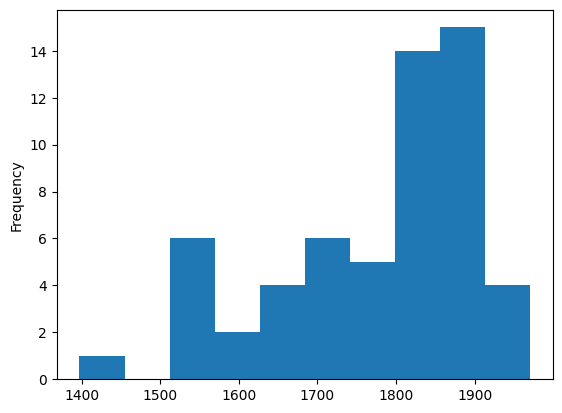

In [92]:
composers_df.birth.plot(kind = 'hist')

### Grouping on index

In [93]:
df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6]})
df1

,a,b
0,1,4
1,2,5
2,3,6


In [94]:
df2 = pd.DataFrame({'a': [1, 5], 'b': [8, 0]})
df2

,a,b
0,1,8
1,5,0


In [95]:
df_concat = pd.concat([df1, df2])
df_concat

,a,b
0,1,4
1,2,5
2,3,6
0,1,8
1,5,0


In [96]:
by_row_index = df_concat.groupby(df_concat.index)
for index_value, group in by_row_index:
    display(group)

,a,b
0,1,4
0,1,8


,a,b
1,2,5
1,5,0


,a,b
2,3,6


In [97]:
df_avg = by_row_index.mean()
df_avg

,a,b
0,1.0,6.0
1,3.5,2.5
2,3.0,6.0


# Aside: SettingWithCopyWarning

Consider the following example dataframe.

In [98]:
df = pd.DataFrame({
    "A": [1, 2, 3, 4, 5],
    "B": [3.125, 4.12, 3.1, 6.2, 7.]
})
df

,A,B
0,1,3.125
1,2,4.120
2,3,3.100
3,4,6.200
4,5,7.000


What's the difference between these two operations?

In [99]:
# Method 1: Chained indexing
df[df['A'] > 2]['B']

2    3.1
3    6.2
4    7.0
Name: B, dtype: float64

In [100]:
# Method 2: using .loc
df.loc[df['A'] > 2, 'B'] 

2    3.1
3    6.2
4    7.0
Name: B, dtype: float64

These both yield the same results. However, method 2 (`.loc`) is much preferred over method 1 (chained indexing).
- In method 1 `df[df['A'] > 2]` performs a first operation and then another operation selects the series indexed by `'B'`: pandas sees these operations as separate events.
- In method 2 the `.loc` operation allows pandas to deal with this as a single entity, and is typically faster!

Things become more complicated if such indexing is used for an assignment.

In [101]:
df[df['A'] > 2]['B'] = 99

/var/folders/27/y8zb96dj4rz5c5pd6d84yd440000gn/T/ipykernel_27741/3991393668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['A'] > 2]['B'] = 99


In [102]:
df

,A,B
0,1,3.125
1,2,4.120
2,3,3.100
3,4,6.200
4,5,7.000


What's going on under the hood:
```python
df[df['A'] > 2]['B'] = 99
```
is basically equivalent to:
```python
df.__getitem__(df['A'] > 2).__setitem__('B', 99)
```

From the [docs](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-view-versus-copy):

>*It’s very hard to predict whether a `__getitem__` will return a view or a copy (it depends on the memory layout of the array, about which pandas makes no guarantees), and therefore whether the* `__setitem__` *will modify `df` or a temporary object that gets thrown out immediately afterward. **That’s what*** `SettingWithCopy`  ***is warning you about!***


In [103]:
df.loc[df['A'] > 2, 'B'] = 99
df

,A,B
0,1,3.125
1,2,4.120
2,3,99.000
3,4,99.000
4,5,99.000


Instead, `df.loc` is guaranteed to be `df` itself!

Takeaways:
- avoid chained indexing and use `loc` or `iloc` instead;
- use `DataFrame.copy(deep=True)` for obtaining an explicit copy and avoid unintended modifications to the original DataFrame

### Towards Pandas 3.0: Copy-on-Write

From the [docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html#previous-behavior):
> *pandas indexing behavior is tricky to understand. Some operations return views while other return copies. Depending on the result of the operation, mutating one object might accidentally mutate another*

Since pandas 1.5, a new mechanism named Copy-on-Write has been introduced to avoid unintended behaviour. [Copy-on-Write](https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html#copy-on-write-cow)  will become the default in pandas 3.0. It is recommended to turn it on now to benefit from all improvements.

- CoW will lead to more predictable behavior since it is not possible to update more than one object with one statement, e.g. indexing operations or methods won’t have side-effects.
- CoW means that any DataFrame or Series derived from another in any way always behaves as a copy. As a consequence, we can only change the values of an object through modifying the object itself. CoW disallows updating a DataFrame or a Series that shares data with another DataFrame or Series object inplace.
- This avoids side-effects when modifying values and hence, most methods can avoid actually copying the data and only trigger a copy when necessary.

In [104]:
pd.options.mode.copy_on_write = False # default behaviour for pandas < 3.0

df = pd.DataFrame({"foo": [1, 2, 3], "bar": [4, 5, 6]})

print('\n','this is DF')
display(df)

subset = df["foo"]

print('\n','this is SUBSET')
display(subset)

subset.iloc[0] = 100
print('\n','this is MODIFIED SUBSET')
display(subset)

print('\n','this is DF')
display(df)


 this is DF


,foo,bar
0,1,4
1,2,5
2,3,6



 this is SUBSET


0    1
1    2
2    3
Name: foo, dtype: int64


 this is MODIFIED SUBSET


0    100
1      2
2      3
Name: foo, dtype: int64


 this is DF


,foo,bar
0,100,4
1,2,5
2,3,6


Mutating `subset`, e.g. updating its values, also updates `df`. The exact behavior is hard to predict. Copy-on-Write solves accidentally modifying more than one object, it explicitly disallows this. With CoW enabled, `df` is unchanged:

In [105]:
pd.options.mode.copy_on_write = True # default behaviour for pandas >= 3.0

df = pd.DataFrame({"foo": [1, 2, 3], "bar": [4, 5, 6]})

print('\n','this is DF')
display(df)

subset = df["foo"]

print('\n','this is SUBSET')
display(subset)

subset.iloc[0] = 100
print('\n','this is MODIFIED SUBSET')
display(subset)

print('\n','this is DF')
display(df)


 this is DF


,foo,bar
0,1,4
1,2,5
2,3,6



 this is SUBSET


0    1
1    2
2    3
Name: foo, dtype: int64


 this is MODIFIED SUBSET


0    100
1      2
2      3
Name: foo, dtype: int64


 this is DF


,foo,bar
0,1,4
1,2,5
2,3,6


Chained assignment will never work

In [106]:
pd.options.mode.copy_on_write = False # default behaviour for pandas < 3.0

df = pd.DataFrame({
    "A": [1, 2, 3, 4, 5],
    "B": [3.125, 4.12, 3.1, 6.2, 7.]
})
display(df)
df[df['A'] > 2]['B']=99
display(df)


,A,B
0,1,3.125
1,2,4.120
2,3,3.100
3,4,6.200
4,5,7.000


/var/folders/27/y8zb96dj4rz5c5pd6d84yd440000gn/T/ipykernel_27741/2953165367.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['A'] > 2]['B']=99


,A,B
0,1,3.125
1,2,4.120
2,3,3.100
3,4,6.200
4,5,7.000


In [107]:
pd.options.mode.copy_on_write = True # default behaviour for pandas >= 3.0

df = pd.DataFrame({
    "A": [1, 2, 3, 4, 5],
    "B": [3.125, 4.12, 3.1, 6.2, 7.]
})
display(df)
df[df['A'] > 2]['B']=99
display(df)


,A,B
0,1,3.125
1,2,4.120
2,3,3.100
3,4,6.200
4,5,7.000


/var/folders/27/y8zb96dj4rz5c5pd6d84yd440000gn/T/ipykernel_27741/2572242548.py:8: ChainedAssignmentError: A value is trying to be set on a copy of a DataFrame or Series through chained assignment.
When using the Copy-on-Write mode, such chained assignment never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy.

Try using '.loc[row_indexer, col_indexer] = value' instead, to perform the assignment in a single step.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['A'] > 2]['B']=99


,A,B
0,1,3.125
1,2,4.120
2,3,3.100
3,4,6.200
4,5,7.000
